# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [1]:
#Antes de comenzar, importamos las librerias necesarias
import requests
import pandas as pd #dataframe manipulator

#Dado que está la tormenta Santa Rosa, un producto de interés es el paraguas
buscar = "Paraguas"

# A la hora de buscar, reemplazamos $SITE_ID por MLA, que es el sitio de Argentina.
# Además, reemplazamos ítem por el ítem a buscar y los espacios por %20
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20")) 
print(url)
# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text


https://api.mercadolibre.com/sites/MLA/search?q=Paraguas
<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"Paraguas","paging":{"total":3345,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA1896418308","title":"Paraguas Reforzado Anti Viento Diseño Colores Automático Color Negro 310095 Diseño De La Tela Liso","condition":"new","thumbnail_id":"837403-MLU75851814926_042024","catalog_product_id":"MLA35538744","listing_type_id":"gold_special","sanitized_title":"paraguas-reforzado-anti-viento-diseno-colores-automatico-color-negro-310095-diseno-de-la-tela-liso","permalink":"https://www.mercadolibre.com.ar/paraguas-reforzado-anti-viento-diseno-colores-automatico-color-negro-310095-diseno-de-la-tela-liso/p/MLA35538744#wid=MLA1896418308&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA412056","domain_id":"MLA-UMBRELLAS","thumbnail":"http://http2.mlstatic.com/D_837403-MLU75851814926_042024-I.jpg","currency_id":"ARS","order_backend":1,"price":12700,"original_price":null,"sale_price":{"price_id"

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [37]:
# Ahora guardamos el resultado en un diccionario (json) para luego crear un DataFrame
data = response.json()
#type(data) # dict
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'Paraguas',
 'paging': {'total': 3345, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1896418308',
   'title': 'Paraguas Reforzado Anti Viento Diseño Colores Automático Color Negro 310095 Diseño De La Tela Liso',
   'condition': 'new',
   'thumbnail_id': '837403-MLU75851814926_042024',
   'catalog_product_id': 'MLA35538744',
   'listing_type_id': 'gold_special',
   'sanitized_title': 'paraguas-reforzado-anti-viento-diseno-colores-automatico-color-negro-310095-diseno-de-la-tela-liso',
   'permalink': 'https://www.mercadolibre.com.ar/paraguas-reforzado-anti-viento-diseno-colores-automatico-color-negro-310095-diseno-de-la-tela-liso/p/MLA35538744#wid=MLA1896418308&sid=unknown',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA412056',
   'domain_id': 'MLA-UMBRELLAS',
   'thumbnail': 'http://http2.mlstatic.com/D_837403-MLU75851814926_042024-I.jpg',
   'currency_id':

In [59]:
# Para guardar el precio de los paraguas, hacemos un for loop para recorrer los resultados
#Primero inicializamos una lista

precios = []

for item in data["results"]:
    precios.append({
        "nombre_del_item": item["title"],
        "precio": item["price"],
    })

precios

[{'nombre_del_item': 'Paraguas Reforzado Anti Viento Diseño Colores Automático Color Negro 310095 Diseño De La Tela Liso',
  'precio': 12700},
 {'nombre_del_item': 'Paragüas Corto Reforzado Automático Anti-viento ',
  'precio': 12500},
 {'nombre_del_item': 'Paraguas Automático Abre Cierra Corto Reforzado 10 Gajos Hq',
  'precio': 26640},
 {'nombre_del_item': 'Unicross 62.p5004 Paraguas Automático 21.5 Negro',
  'precio': 16390},
 {'nombre_del_item': 'Paraguas Corto Unicross 21,5 Pulgadas Abre Automático Antiviento',
  'precio': 16990},
 {'nombre_del_item': 'Paraguas Transparente Vinilico Varios Colores Subte A',
  'precio': 5943.79},
 {'nombre_del_item': 'Paraguas Sistema Invertido Reforzado Antiviento + Colores',
  'precio': 22600},
 {'nombre_del_item': 'Paraguas Ejecutivo Corto 8 Varillas Calidad Polo Club Oferta',
  'precio': 12340.5},
 {'nombre_del_item': 'Paraguas Impermeable Infantil Lluvia Automatico Disney Wabro Color Frozen Celeste',
  'precio': 15199.05},
 {'nombre_del_item':

In [61]:
paraguas_df = pd.DataFrame(precios)
paraguas_df.head()


nombre_del_item   precio
0  Paraguas Reforzado Anti Viento Diseño Colores ...  12700.0
1   Paragüas Corto Reforzado Automático Anti-viento   12500.0
2  Paraguas Automático Abre Cierra Corto Reforzad...  26640.0
3   Unicross 62.p5004 Paraguas Automático 21.5 Negro  16390.0
4  Paraguas Corto Unicross 21,5 Pulgadas Abre Aut...  16990.0

In [62]:
average_price = paraguas_df['precio'].mean()
average_price

15764.8596

In [63]:
max_price = paraguas_df['precio'].max()
max_price

59900.0

In [64]:
min_price = paraguas_df['precio'].min()
min_price

5943.79

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

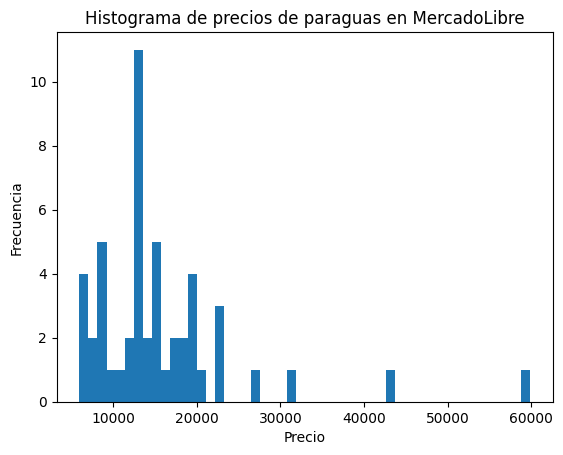

In [66]:
#Para hacer un histograma, importamos la librería matplotlib
import matplotlib.pyplot as plt

# Creamos el histograma con 10 bins
plt.hist(paraguas_df['precio'], bins=50)

# Agregamos el nombre de los ejes y el título
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios de paraguas en MercadoLibre')

# Mostremos el histograma
plt.show()

Text(0, 0.5, 'cantidad de artículos')

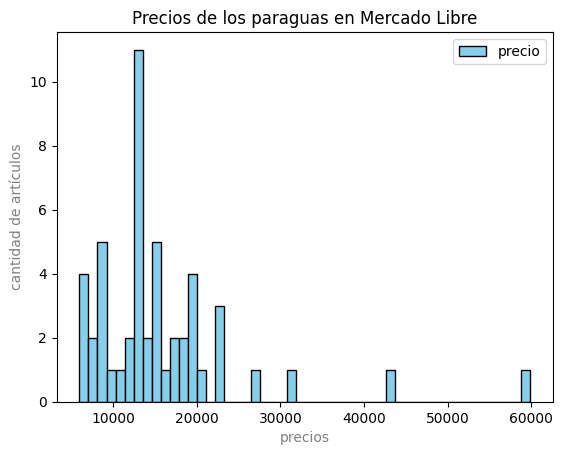

In [67]:
ax = paraguas_df.plot(kind='hist', title='Precios de los paraguas en Mercado Libre', bins=50, color='skyblue', edgecolor='black')
ax.set_xlabel('precios',color='grey')
ax.set_ylabel('cantidad de artículos',color='grey')
# A simple vista pareciera ser que hay cuatro paraguas cuyos precios son muy altos.

In [69]:
# Para buscar los outliers, definimos el rango intercuartílico
q1 = paraguas_df['precio'].quantile(0.25) # 25th percentile
q3 = paraguas_df['precio'].quantile(0.75) # 75th percentile
iqr = q3 - q1 # Interquartile range
lower_bound = q1 - 1.5 * iqr # Lower bound
upper_bound = q3 + 1.5 * iqr # Upper bound

# Identifico los precios que son inferiores al límite inferior y superiores al límite superior
outliers = paraguas_df[(paraguas_df['precio'] < lower_bound) | (paraguas_df['precio'] > upper_bound)]

outliers

nombre_del_item   precio
35  Kaddygolf Paraguas Wilson Doble Techo 62¨- Nue...  59900.0
39  Set X 2 Paraguas Invertido Lluvia Reversible C...  43537.0
47  Paraguas Tamaño Mini Wellington Polo Sistema M...  31153.5

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

Vamos a explorar la funcionalidad de búsqueda por categorías en Mercado Libre Argentina (MLA). De forma resumida, esta opción devuelve publicaciones que pertenecen a una categoría de publicación de Mercado Libre. Para más información se puede acceder al apartado de [Cateogrías y Atributos](https://developers.mercadolibre.com.ar/es_ar/categorias-y-atributos). 

In [49]:
buscar2 = "MLA1055" # Por ejemplo, vamos a buscar la categoría MLA5726, que corresponde a "Celulares"

# A la hora de buscar, reemplazamos $SITE_ID por MLA, que es el sitio de Argentina.
# Además, reemplazamos ítem por el ítem a buscar y los espacios por %20
url2 = "https://api.mercadolibre.com/sites/{}/search?category={}".format("MLA", buscar2.replace(" ", "%20")) 
print(url2)
# Hacemos el pedido o request y obtenemos la response
response2 = requests.request("GET", url2)
print(response2) # correcto

# Vemos el texto
response2.text


https://api.mercadolibre.com/sites/MLA/search?category=MLA1055
<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","paging":{"total":26321,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA1864518624","title":"Teléfono Celular Zte Blade A34 Gray Rva 2gb 64 Gb","condition":"new","thumbnail_id":"751668-MLA78041120199_072024","catalog_product_id":null,"listing_type_id":"gold_special","sanitized_title":"telefono-celular-zte-blade-a34-gray-rva-2gb-64-gb","permalink":"https://articulo.mercadolibre.com.ar/MLA-1864518624-telefono-celular-zte-blade-a34-gray-rva-2gb-64-gb-_JM","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA1055","domain_id":"MLA-CELLPHONES","thumbnail":"http://http2.mlstatic.com/D_751668-MLA78041120199_072024-I.jpg","currency_id":"ARS","order_backend":1,"price":146999,"original_price":199999,"sale_price":{"price_id":"","amount":146999,"conditions":{"eligible":true,"context_restrictions":["channel_marketplace"],"start_time":"2024-08-31T03:00:00Z","end_time":"2024-09-01T02:59:59Z"},"currency_id":"ARS","exc

In [50]:
data2 = response2.json()
data2

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'paging': {'total': 26321, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1864518624',
   'title': 'Teléfono Celular Zte Blade A34 Gray Rva 2gb 64 Gb',
   'condition': 'new',
   'thumbnail_id': '751668-MLA78041120199_072024',
   'catalog_product_id': None,
   'listing_type_id': 'gold_special',
   'sanitized_title': 'telefono-celular-zte-blade-a34-gray-rva-2gb-64-gb',
   'permalink': 'https://articulo.mercadolibre.com.ar/MLA-1864518624-telefono-celular-zte-blade-a34-gray-rva-2gb-64-gb-_JM',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA1055',
   'domain_id': 'MLA-CELLPHONES',
   'thumbnail': 'http://http2.mlstatic.com/D_751668-MLA78041120199_072024-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 146999,
   'original_price': 199999,
   'sale_price': {'price_id': '',
    'amount': 146999,
    'conditions': {'eligible': True,
     'context_restriction

In [71]:
# Create an empty list to store the price comparison results
price_comparison = []

# Iterate through each item in data2
for item in data2["results"]:
    # Extract the price of the item
    price = item["price"]
    
    # Compare the price with the average price
    if price > average_price:
        comparison = "higher"
    elif price < average_price:
        comparison = "lower"
    else:
        comparison = "equal"
    
    # Append the item and its price comparison to the list
    price_comparison.append({
        "item": item["title"],
        "price": price,
        "comparison": comparison
    })

# Create a DataFrame from the price comparison list
price_comparison_df = pd.DataFrame(price_comparison)

# Display the price comparison DataFrame
price_comparison_df

item       price comparison
0   Teléfono Celular Zte Blade A34 Gray Rva 2gb 64 Gb   146999.00     higher
1   Xiaomi Redmi 13c Dual Sim 128 Gb  Midnight Bla...   349999.00     higher
2                 Motorola Moto E22 64gb Azul 4gb Ram   247999.00     higher
3          Samsung Galaxy A04s 4 + 128gb Color Blanco   282999.00     higher
4             Moto G24 Power 128gb + 8gb Glacier Blue   429999.00     higher
5       Samsung Galaxy A15 128 Gb Azul Claro 4 Gb Ram   349000.00     higher
6                Tcl 40 Se 256 Gb  Dark Gray 6 Gb Ram   319999.00     higher
7               Alcatel 1 Ultra 32 Gb  Negro 1 Gb Ram    63399.00     higher
8   Zte Blade V50 Design 256 Gb Negro 6 Gb Ram (+1...   269999.00     higher
9       Zte Blade A33 Plus 32 Gb  Space Gray 2 Gb Ram   139999.00     higher
10  Infinix Hot 40 Pro Dual Sim 256 Gb Verde 8 Gb Ram   439999.00     higher
11          Samsung Galaxy A05 128 Gb  Negro 4 Gb Ram   321998.00     higher
12  Teléfono Celular Zte Blade A73 128gb 4gb Ram S...   249999.00     higher
13  Xiaomi Redmi Note 13 Pro Black 4g Dual Sim 256...   674999.00     higher
14     Tecno Spark 20c Dual Sim 128 Gb Negro 4 Gb Ram   249999.00     higher
15   Samsung Galaxy A35 5g 256gb Awesome Navy 8gb Ram   799999.00     higher
16                Kodak Seren D55l 32gb Negro 2gb Ram    89999.00     higher
17                  Tcl 408 64gb Gravity Gray 6gb Ram   244999.00     higher
18                   Tcl 405 64 Gb Dark Grey 2 Gb Ram   184999.00     higher
19    Celular Samsung Galaxy A04 64gb 4gb Color Verde   254999.00     higher
20   Motorola Moto G24 128 Gb Matte Charcoal 4 Gb Ram   369999.00     higher
21   Motorola Moto G84 5g 256 Gb  Negro Espacial 8...   644999.00     higher
22     Xiaomi Poco C65 Dual Sim 256 Gb Negro 8 Gb Ram   371000.00     higher
23               Tcl 40 Se 128 Gb  Dark Gray 4 Gb Ram   258999.00     higher
24  Samsung Galaxy A15 4g Dual Sim 128 Gb  Azul Os...   352919.00     higher
25        Nokia 106 (2018) 4 Mb  Gris Oscuro 4 Mb Ram    32786.00     higher
26             Celular Alcatel 1 Ultra32 32/1gb Black    69999.00     higher
27                      Moto G14 128 Gb Gris 4 Gb Ram   299999.00     higher
28            Quantum Yolo Plus 32 Gb  Negro 2 Gb Ram   119998.00     higher
29        Ipro F183 2g Dual Sim 32 Mb Negro 32 Mb Ram    36000.00     higher
30  Nokia 106 (2018) Dual Sim 4 Mb  Gris Oscuro 4 ...    39700.00     higher
31                   Apple iPhone 11 (128 Gb) - Negro  1039908.00     higher
32        Samsung Galaxy A14 128 Gb Plateado 4 Gb Ram   479999.00     higher
33    Tecno Spark 20c Dual Sim 256 Gb  Negro 4 Gb Ram   299999.00     higher
34                 Motorola Moto G54 5g 8+128 Gb Azul   549999.00     higher
35           Kanji Fon Dual Sim 32 Mb  Rojo 32 Mb Ram    26999.00     higher
36   Samsung Galaxy A55 128gb Awesome Iceblue 8gb Ram   939999.00     higher
37  Moto Edge 40 Pro De 256gb Y 12gb Ram Color Cel...  1299999.00     higher
38                             Moto G85 5g Urban Grey   699999.00     higher
39      Xiaomi Redmi A3 Dual Sim 64 Gb Negro 3 Gb Ram   249999.00     higher
40                      Moto E22 64 Gb  Azul 4 Gb Ram   247999.00     higher
41     Samsung Galaxy A25 5g 5g 256 Gb  Azul 8 Gb Ram   449999.00     higher
42                            Moto G85 5g Olive Green   699999.00     higher
43            Samsung Galaxy A05 64 Gb Negro 4 Gb Ram   273999.00     higher
44  Celular Quantum Yolo Plus 5'' 32gb 2gb Ram - Rojo    98998.00     higher
45           Smartphone Tecno Bg7 Spark 20c 128 + 4gb   269999.00     higher
46  Celular Cat S22 Plus Resistente Ip68 16gb 2gb Ram   229498.00     higher
47  Xiaomi Redmi Note 13 Pro+ 5g Dual Sim 512 Gb  ...  1009896.00     higher
48     Nokia 110 (2019) Dual Sim 4 Mb  Negro 4 Mb Ram    36777.35     higher
49                Tcl 403 32 Gb  Prime Black 2 Gb Ram   154999.00     higher

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [1]:
# Dado que ya tengo instaladas las librerías, lo primero que hay que hacer es importar las librerías necesarias.
import requests #html requestor
from bs4 import BeautifulSoup #html parser, programa que analiza el código html
import pandas as pd #dataframe manipulator


In [2]:
url = "https://www.lanacion.com.ar/" #url de la página a scrapear

r = requests.get(url) #traigo el contenido del html
contenido = r.content #guardo el contenido en una variable

contenido #muestro el contenido

b'<!DOCTYPE html><html lang="es"><head><meta charset="utf-8"/><meta name="viewport" content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes"/><meta name="theme-color" content="#ffffff"/><title>\xc3\x9altimas noticias de Argentina y el mundo - LA NACION</title><link rel="preload" as="image" fetchPriority="high" media="(max-width: 767px)" href="https://www.lanacion.com.ar/resizer/v2/federico-sturzenegger-javier-milei-y-luis-ZI3RM5BSDRFHZLOR4CHPSOVNZQ.jpeg?auth=578d8802edbcfabfb50db1c4b0defc272b4726099dc49012059d1954bcaa09e4&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true"/><link rel="preload" as="image" fetchPriority="high" media="(min-width: 768px)" href="https://www.lanacion.com.ar/resizer/v2/federico-sturzenegger-javier-milei-y-luis-ZI3RM5BSDRFHZLOR4CHPSOVNZQ.jpeg?auth=578d8802edbcfabfb50db1c4b0defc272b4726099dc49012059d1954bcaa09e4&amp;width=302&amp;height=201&amp;quality=70&amp;smart=true"/><style id="critical-fonts">\n@font-fac

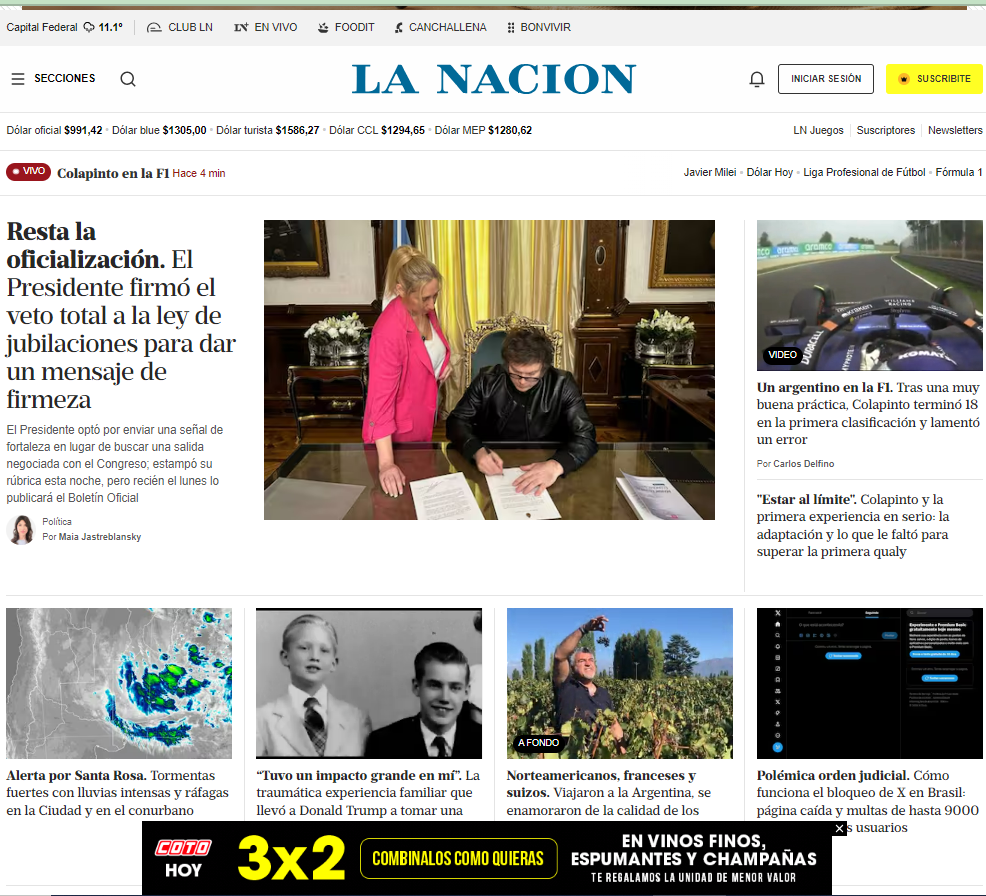

In [3]:
soup = BeautifulSoup(contenido, "html.parser") #parseo el contenido con BeautifulSoup
soup

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Últimas noticias de Argentina y el mundo - LA NACION</title><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/federico-sturzenegger-javier-milei-y-luis-ZI3RM5BSDRFHZLOR4CHPSOVNZQ.jpeg?auth=578d8802edbcfabfb50db1c4b0defc272b4726099dc49012059d1954bcaa09e4&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true" media="(max-width: 767px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/federico-sturzenegger-javier-milei-y-luis-ZI3RM5BSDRFHZLOR4CHPSOVNZQ.jpeg?auth=578d8802edbcfabfb50db1c4b0defc272b4726099dc49012059d1954bcaa09e4&amp;width=302&amp;height=201&amp;quality=70&amp;smart=true" media="(min-width: 768px)" rel="preload"/><style id="critical-fonts">
@font-face {font-f

In [4]:
# Dentro de la sopa, el método "find_all" busca TODOS los elementos de la página con ese tag
# y devuelve un objeto de la clase "bs4.element.ResultSet"
anchor_elements = soup.find_all('a', class_ = 'link ln-link flex flex-column --unstyled') #busco todos los elementos  de la página

print(type(anchor_elements))
print('\n', anchor_elements)


<class 'bs4.element.ResultSet'>

 [<a class="link ln-link flex flex-column --unstyled" href="/economia/dolar/dolar-se-acrecientan-las-dudas-de-que-el-gobierno-pueda-sacar-el-cepo-en-el-corto-plazo-nid28082024/" target="_self" title="Dólar. Se acrecientan las dudas de que el Gobierno pueda sacar el cepo en el corto plazo"><section class="media-container" href="/economia/dolar/dolar-se-acrecientan-las-dudas-de-que-el-gobierno-pueda-sacar-el-cepo-en-el-corto-plazo-nid28082024/" title="Se acrecientan las dudas de que el Gobierno pueda sacar el cepo en el corto plazo"><picture class="ln-placeholder flex jc-center ai-center relative ratio-3-2"><source media="(max-width: 767px)" srcset="https://www.lanacion.com.ar/resizer/v2/federico-sturzenegger-javier-milei-y-luis-ZI3RM5BSDRFHZLOR4CHPSOVNZQ.jpeg?auth=578d8802edbcfabfb50db1c4b0defc272b4726099dc49012059d1954bcaa09e4&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true"/><img alt="Se acrecientan las dudas de que el Gobierno pueda sacar e

In [11]:
# Tenemos que guardar estos links para armar el df
links = [] # primero creamos una lista
#Además, queremos guardar el dominio de la página para armar los links completos
domain = "https://www.lanacion.com.ar/"

# Extraemos el texto de cada elemento <a> y lo guardamos
for anchor_element in anchor_elements:
    #anchor_link = anchor_element.text.strip() #strip() elimina los espacios en blanco al principio y al final
    anchor_text = domain + anchor_element['href'] #guardo el dominio y el link
        
    links.append({
        'links': anchor_text
        })


In [12]:
links

[{'links': 'https://www.lanacion.com.ar//economia/dolar/dolar-se-acrecientan-las-dudas-de-que-el-gobierno-pueda-sacar-el-cepo-en-el-corto-plazo-nid28082024/'},
 {'links': 'https://www.lanacion.com.ar//deportes/automovilismo/franco-colapinto-en-la-formula-1-en-vivo-nid31082024/'},
 {'links': 'https://www.lanacion.com.ar//deportes/automovilismo/franco-colapinto-es-un-poco-la-adaptacion-que-me-falta-estar-al-limite-desde-el-principio-nid31082024/'},
 {'links': 'https://www.lanacion.com.ar//politica/javier-milei-se-apresta-a-firmar-un-veto-total-a-la-ley-de-jubilaciones-para-dar-un-mensaje-de-nid30082024/'},
 {'links': 'https://www.lanacion.com.ar//seguridad/una-viga-de-cemento-dos-neumaticos-reventados-y-un-ataque-furtivo-la-pesadilla-en-la-panamericana-nid31082024/'},
 {'links': 'https://www.lanacion.com.ar//estados-unidos/la-traumatica-experiencia-familiar-que-llevo-a-donald-trump-a-tomar-una-radical-decision-nid31082024/'},
 {'links': 'https://www.lanacion.com.ar//el-mundo/europa-tambi

In [13]:
# Creamos un dataframe a partir de la lista de títulos
links_df = pd.DataFrame(links)
links_df

links
0    https://www.lanacion.com.ar//economia/dolar/do...
1    https://www.lanacion.com.ar//deportes/automovi...
2    https://www.lanacion.com.ar//deportes/automovi...
3    https://www.lanacion.com.ar//politica/javier-m...
4    https://www.lanacion.com.ar//seguridad/una-vig...
..                                                 ...
116  https://www.lanacion.com.ar//revista-lugares/l...
117  https://www.lanacion.com.ar//economia/credito-...
118  https://www.lanacion.com.ar//feriados/2024/tod...
119  https://www.lanacion.com.ar//horoscopo/horosco...
120  https://www.lanacion.com.ar//economia/sueldos-...

[121 rows x 1 columns]

In [14]:
#Ahora que tenemos el df con los links, vamos a guardarlos en un archivo de excel
#Para eso, primero necesitamos instalar openpyxl
%pip install openpyxl

In [15]:
import openpyxl
# Y los podemos guardar como excel
links_df.to_excel('links.xlsx', index=False)